<hr>
<a id="description">
    
# Dataset description
    
</a>
<br>

- **Employee_ID:** The unique identifier of the employee
- **Gender:** The gender of the employee



<a  id="import">

## Import Libraries

</a>

In [1]:
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np

<a  id="import">

## Load data

</a>

In [2]:
df_train = pd.read_excel('farmacias.xlsx')
df_test = pd.read_excel('farmacias_desconhecidos.xlsx',header=None)
df_test.columns = list(df_train.columns)[:-1]
aux = df_test.copy()
aux

,age,Sex,c1,c2,c3,c4
0,34,F,HIGH,HIGH,0.864092,0.067528
1,55,F,HIGH,NORMAL,0.821441,0.047962
2,46,M,HIGH,NORMAL,0.868366,0.056180
3,70,M,LOW,NORMAL,0.789451,0.028714
4,69,F,HIGH,HIGH,0.585406,0.026672
5,60,F,NORMAL,NORMAL,0.834857,0.033629
6,58,M,NORMAL,HIGH,0.543761,0.074563
7,63,F,NORMAL,NORMAL,0.641137,0.024593
8,52,M,HIGH,NORMAL,0.518609,0.026845
9,58,F,HIGH,HIGH,0.678409,0.028628


<a  id="import">

## Normalize data

</a>

In [3]:
df_train['Sex'] = preprocessing.LabelEncoder().fit(df_train.Sex).transform(df_train.Sex)#list(pd.factorize(df_train.Sex)[0])
df_train['c1'] = preprocessing.LabelEncoder().fit(df_train.c1).transform(df_train.c1)#list(pd.factorize(df_train.c1)[0])
df_train['c2'] = preprocessing.LabelEncoder().fit(df_train.c2).transform(df_train.c2)#list(pd.factorize(df_train.c2)[0])
df_train['Drug'] = preprocessing.LabelEncoder().fit(df_train.Drug).transform(df_train.Drug)#list(pd.factorize(df_train.Drug)[0])

df_test['Sex'] = preprocessing.LabelEncoder().fit(df_test.Sex).transform(df_test.Sex)#list(pd.factorize(df_test.Sex)[0])
df_test['c1'] = preprocessing.LabelEncoder().fit(df_test.c1).transform(df_test.c1)#list(pd.factorize(df_test.c1)[0])
df_test['c2'] = preprocessing.LabelEncoder().fit(df_test.c2).transform(df_test.c2)#list(pd.factorize(df_test.c2)[0])

In [4]:
df_train

,age,Sex,c1,c2,c3,c4,Drug
0,15,0,0,1,0.894684,0.072149,0
1,15,0,2,1,0.809073,0.039349,4
2,15,1,1,0,0.575552,0.061487,2
3,15,1,1,0,0.799167,0.059166,2
4,15,1,2,1,0.550487,0.048127,3
...,...,...,...,...,...,...,...
496,74,0,2,0,0.779044,0.059357,3
497,74,0,2,1,0.662730,0.033061,4
498,74,0,2,1,0.896110,0.078623,3
499,74,1,1,0,0.519806,0.038353,2


<a  id="import">

## Information about the dataset

</a>

In [5]:
summary = df_train.describe(include = 'all').transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
age,501.0,43.968064,17.570856,15.000000,29.000000,44.000000,59.000000,74.000000
Sex,501.0,0.495010,0.500475,0.000000,0.000000,0.000000,1.000000,1.000000
c1,501.0,0.998004,0.811170,0.000000,0.000000,1.000000,2.000000,2.000000
c2,501.0,0.491018,0.500419,0.000000,0.000000,0.000000,1.000000,1.000000
c3,501.0,0.706802,0.114372,0.500517,0.613367,0.719612,0.804751,0.899774
c4,501.0,0.050147,0.017411,0.020152,0.035501,0.050037,0.065739,0.079867
Drug,501.0,2.836327,1.375921,0.000000,2.000000,3.000000,4.000000,4.000000


<a  id="import">

## Model

</a>

In [6]:
# select th dataset and target
x = df_train.drop(['Drug'], axis=1)
y = df_train['Drug']

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['Drug'], axis=1), df_train['Drug'], test_size=0.30, random_state=70)


In [7]:
# train the model
model = MLPClassifier(activation='relu')
model.fit(X_train, y_train)
model.score(X_train,y_train)

C:\Users\fullstack\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5171428571428571

In [8]:
r = model.predict(X_test)
mean_squared_error(r, y_test)

2.9403973509933774

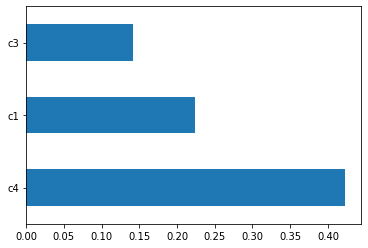

In [12]:
# find the variable that most influence the drug type
classifier = RandomForestClassifier(n_estimators=200, random_state=0).fit(X_train, y_train)
feat_importances = pd.Series(classifier.feature_importances_, index=x.columns)
feat_importances.nlargest(3).plot(kind='barh')

In [10]:
predictions = model.predict(df_test)
df_test['Drug']=predictions

In [11]:

df_test['Sex']=aux['Sex']
df_test['c1']=aux['c1']
df_test['c2']=aux['c2']
df_test
#df_test.to_csv('teste.csv',index=False)

,age,Sex,c1,c2,c3,c4,Drug
0,34,F,HIGH,HIGH,0.864092,0.067528,0
1,55,F,HIGH,NORMAL,0.821441,0.047962,4
2,46,M,HIGH,NORMAL,0.868366,0.056180,4
3,70,M,LOW,NORMAL,0.789451,0.028714,4
4,69,F,HIGH,HIGH,0.585406,0.026672,1
5,60,F,NORMAL,NORMAL,0.834857,0.033629,3
6,58,M,NORMAL,HIGH,0.543761,0.074563,3
7,63,F,NORMAL,NORMAL,0.641137,0.024593,3
8,52,M,HIGH,NORMAL,0.518609,0.026845,4
9,58,F,HIGH,HIGH,0.678409,0.028628,1
